# **PROJECT-BASED INTERN : DATA SCIENTIST**
# **KALBE NUTRITIONALS X RAKAMIN ACADEMY**

oleh Maya Indah Nurrohmah

## **A. *Business Understanding***

> Misalkan sebagai seorang *Data Scientist* di Kalbe Nutritionals sedang mendapatkan *project* baru dari tim inventory dan tim *marketing* dengan beberapa permintaan. 
> * **Tim *Inventory*** meminta membantu memprediksi jumlah penjualan dari total keseluruhan produk Kalbe agar dapat mengetahui perkiraan quantity produk yang terjual
>
> * **Tim *Marketing*** meminta untuk membuat *customer segmentation* agar dapat memberikan *personalized promotion* dan *sales treatment* kepada *customer*.


**LIBRARIES**

Cell berikut berisi semua library yang departemen sales gunakan.

In [1]:
# Import library

from pprint import pprint
from time import time
import numpy as np                                    # Untuk mengolah angka (Menghitung log, jarak, nilai abs, dll)
import pandas as pd   
import matplotlib                                     # Untuk mengolah data (Import data, manipulasi data, dll)
import matplotlib.pyplot as plt                       # Untuk memvisualisasikan data
from matplotlib import style
import matplotlib as mpl
import seaborn as sns                                 # Untuk memvisualisasikan data

from sklearn.cluster import KMeans, MiniBatchKMeans   # Model machine learning
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import normalize
from yellowbrick.cluster import KElbowVisualizer


import statsmodels.api as sm
import warnings
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'retina'        #set 'png' here when working on notebook
%matplotlib inline
warnings.filterwarnings('ignore')

**DATA LOADING**

Dalam melakukan analisa menggunakan dataset `data_customer`, `data_products`, `data_store`, `data_transactions`

In [2]:
# Import dan menampilkan data_customer
 
data_customer = pd.read_csv('Case Study - Customer.csv')
data_customer

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"
...,...,...,...,...,...
442,443,33,1,NaN,"9,28"
443,444,53,0,Married,"15,31"
444,445,51,0,Married,"14,48"
445,446,57,0,Married,"7,81"


In [3]:
# Import dan menampilkan data_products
 
data_products = pd.read_csv('Case Study - Product.csv')
data_products

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200
5,P6,Cashew,18000
6,P7,Coffee Candy,9400
7,P8,Oat,16000
8,P9,Yoghurt,10000
9,P10,Cheese Stick,15000


In [4]:
# Import dan menampilkan data_store
 
data_store = pd.read_csv('Case Study - Store.csv')
data_store

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816,666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914,864","107,608,238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797,068","110,370,529"
3,4,Gita Ginara,Gita,General Trade,"-6,966,667","110,416,664"
4,5,Bonafid,Gita,General Trade,"-7,250,445","112,768,845"
5,6,Lingga,Lingga,Modern Trade,"-5,135,399","11,942,379"
6,7,Buana Indah,Buana,General Trade,"3,316,694","114,590,111"
7,8,Sinar Harapan,Harapan Baru,General Trade,"554,829","95,323,753"
8,9,Lingga,Lingga,Modern Trade,"-3,654,703","128,190,643"
9,10,Harapan Baru,Harapan Baru,General Trade,"3,597,031","98,678,513"


In [5]:
# Import dan menampilkan data_transactions
 
data_transactions = pd.read_csv('Case Study - Transaction.csv')
data_transactions

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,1/1/2022,P3,7500,4,30000,12
1,TR16356,165,1/1/2022,P9,10000,7,70000,1
2,TR1984,183,1/1/2022,P1,8800,4,35200,4
3,TR35256,160,1/1/2022,P1,8800,7,61600,4
4,TR41231,386,1/1/2022,P9,10000,1,10000,4
...,...,...,...,...,...,...,...,...
5015,TR54423,243,31/12/2022,P10,15000,5,75000,3
5016,TR5604,271,31/12/2022,P2,3200,4,12800,9
5017,TR81224,52,31/12/2022,P7,9400,6,56400,9
5018,TR85016,18,31/12/2022,P8,16000,3,48000,13


## **B. *Data Understanding***

### **Data Dictionary**

> Pertama, kita perlu mengetahui representasi setiap kolom pada data sebelum melakukan eksplorasi lebih jauh.
> #### **a. data_customer**
| Column | Description |
| ------ | ----------- |
| `CustomerID` | No Unik Customer |
| `Age` | Usia Customer (Tahun) |
| `Gender` | Jenis Kelamin (0 Wanita, 1 Pria) |
| `Marital Status` | Married, Single (Blm menikah/Pernah menikah) |
| `Income` | Pendapatan per Bulan dalam Jutaan Rupiah|
>
> #### **b. data_store**
| Column | Description |
| ------ | ----------- |
| `StoreID` | Kode Unik Store |
| `StoreName` | Nama Toko |
| `GroupStore` | Nama group |
| `Type` | Modern Trade, General Trade |
| `Latitude` | Kode Latitude |
| `Longitude` | Kode Longitude |
>
> #### **b. data_products**
| Column | Description |
| ------ | ----------- |
| `ProductID` | Kode Unik Product |
| `Product Name` | Nama Product |
| `Price` | Harga dlm rupiah |
>
> #### **b. data_transactions**
| Column | Description |
| ------ | ----------- |
| `TransactionID` | Kode Unik Transaksi |
| `CustomerID` | No Unik Customer |
| `Date` | Tanggal transaksi |
| `ProductID` | Kode Unik Product |
| `Price` | Harga Item (Rp)|
| `Qty` | Jumlah Item yang dibeli |
| `Total Amount` | Price x Qty (Rp) |
| `StoreID` | Kode Unik Store |

## **C. *Data Pre-processing***

### **1. Memeriksa Informasi Data, Tipe Data, dan Mengatasi Nilai Null**

#### **a. data_customer**

In [6]:
# Menampilkan informasi data_customer

data_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


 **Keterangan:**
 * Karena tipe data dalam `CustomerID, dan Gender` belum sesuai dengan nilai-nilai di dalam fiturnya, maka perlu dilakukan penyesuaian atau pengubahan tipe data sebagai berikut:

In [7]:
# Mengubah tipe data 'CustomerID' dan 'Gender' menjadi object

data_customer['CustomerID'] = data_customer['CustomerID'].astype("object")
data_customer['Gender'] = data_customer['Gender'].astype("object")
data_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    object
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    object
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(1), object(4)
memory usage: 17.6+ KB


In [8]:
# Memeriksa nilai null

print(data_customer.isnull().sum())

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64


In [9]:
# Menghapus nilai null

data_customer = data_customer.dropna()
data_customer.count()

CustomerID        444
Age               444
Gender            444
Marital Status    444
Income            444
dtype: int64

In [10]:
# Menampilkan umur customer termuda

data_customer[data_customer.Age == data_customer.Age.min()]

,CustomerID,Age,Gender,Marital Status,Income
127,128,0,1,Married,"6,77"


In [11]:
# Menampilkan umur customer yang berusia kurang dari 18 tahun

data_customer[data_customer.Age < 18]

,CustomerID,Age,Gender,Marital Status,Income
11,12,2,1,Married,"4,94"
73,74,3,1,Married,"5,09"
127,128,0,1,Married,"6,77"


Berdasarkan data di atas, data customer berusia 2 tahun, 3 tahun, dan 0 tahun memiliki status "Married" dan income akan dihapus karena data tersebut penulis asumsikan tidak valid.

In [12]:
# Mengecualikan customer berusia 2,3,dan 0 tahun

data_customer = data_customer[data_customer['Age'] >= 18]
data_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      441 non-null    object
 1   Age             441 non-null    int64 
 2   Gender          441 non-null    object
 3   Marital Status  441 non-null    object
 4   Income          441 non-null    object
dtypes: int64(1), object(4)
memory usage: 20.7+ KB


In [13]:
data_customer.groupby('Marital Status')['Age'].mean()

Marital Status
Married    43.406528
Single     29.384615
Name: Age, dtype: float64

In [14]:
# Menyimpan data_customer ke csv

data_customer.to_csv('data_customer.csv')

#### **b. data_products**

In [15]:
# Melihat informasi data_products

data_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


#### **c. data_store**

In [16]:
# Melihat informasi data_store

data_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [17]:
# Mengubah tipe data kolom StoreID

data_store['StoreID'] = data_store['StoreID'].astype("object")
data_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     object
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: object(6)
memory usage: 800.0+ bytes


#### **d data_transactions**

In [18]:
# Melihat informasi data_transactions

data_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [19]:
data_transactions['TransactionID'] = data_transactions['TransactionID'].astype("object")
data_transactions['CustomerID'] = data_transactions['CustomerID'].astype("object")
data_transactions['StoreID'] = data_transactions['StoreID'].astype("object")
data_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   object
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   object
dtypes: int64(3), object(5)
memory usage: 313.9+ KB


### **2. Memeriksa Data Duplikat**

#### **a. data_customer**

In [20]:
# Memeriksa data duplikat dalam dataset

duplicate_rows_data_customer = data_customer[data_customer.duplicated()]
print('banyaknya baris yang terduplikat:', duplicate_rows_data_customer.shape)

banyaknya baris yang terduplikat: (0, 5)


In [21]:
# Menampilkan baris yang terduplikat dalam dataset 

duplicate_rows_data_customer

,CustomerID,Age,Gender,Marital Status,Income


**Keterangan:** Berdasarkan 5 kolom dalam dataset, tidak ada baris yang terduplikat dalam dataset

#### **b. data_products**

In [22]:
# Memeriksa data duplikat dalam dataset

duplicate_rows_data_products = data_products[data_products.duplicated()]
print('banyaknya baris yang terduplikat:', duplicate_rows_data_products.shape)

banyaknya baris yang terduplikat: (0, 3)


In [23]:
# Menampilkan baris yang terduplikat dalam dataset 

duplicate_rows_data_products

,ProductID,Product Name,Price


**Keterangan:** Berdasarkan 3 kolom dalam dataset, tidak ada baris yang terduplikat dalam dataset

#### **c. data_store**

In [24]:
# Memeriksa data duplikat dalam dataset

duplicate_rows_data_store = data_store[data_store.duplicated()]
print('banyaknya baris yang terduplikat:', duplicate_rows_data_store.shape)

banyaknya baris yang terduplikat: (0, 6)


In [25]:
# Menampilkan baris yang terduplikat dalam dataset 

duplicate_rows_data_store

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude


**Keterangan:** Berdasarkan 6 kolom dalam dataset, tidak ada baris yang terduplikat dalam dataset

#### **d. data_transactions**

In [26]:
# Memeriksa data duplikat dalam dataset

duplicate_rows_data_transactions = data_transactions[data_transactions.duplicated()]
print('banyaknya baris yang terduplikat:', duplicate_rows_data_transactions.shape)

banyaknya baris yang terduplikat: (0, 8)


In [27]:
# Menampilkan baris yang terduplikat dalam dataset 

duplicate_rows_data_transactions

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID


**Keterangan:** Berdasarkan 8 kolom dalam dataset, tidak ada baris yang terduplikat dalam dataset

### **3. Menggabungkan Keempat Dataset**

In [28]:
# Menggabungkan data_transactions dengan data_customer

data_transactions_dan_customer = pd.merge(data_transactions,data_customer,on='CustomerID',how='left')
data_transactions_dan_customer

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income
0,TR11369,328,1/1/2022,P3,7500,4,30000,12,36.0,0,Married,"10,53"
1,TR16356,165,1/1/2022,P9,10000,7,70000,1,44.0,1,Married,"14,58"
2,TR1984,183,1/1/2022,P1,8800,4,35200,4,27.0,1,Single,"0,18"
3,TR35256,160,1/1/2022,P1,8800,7,61600,4,48.0,1,Married,"12,57"
4,TR41231,386,1/1/2022,P9,10000,1,10000,4,33.0,0,Married,"6,95"
...,...,...,...,...,...,...,...,...,...,...,...,...
5015,TR54423,243,31/12/2022,P10,15000,5,75000,3,38.0,0,Married,"3,34"
5016,TR5604,271,31/12/2022,P2,3200,4,12800,9,29.0,0,Married,"4,74"
5017,TR81224,52,31/12/2022,P7,9400,6,56400,9,37.0,0,Married,"3,73"
5018,TR85016,18,31/12/2022,P8,16000,3,48000,13,47.0,0,Married,"13,6"


In [29]:
# Menggabungkan data_transactions_dan_customer dengan data_products

data_transactions_customer_dan_products= pd.merge(data_transactions_dan_customer,
                                                  data_products,on='ProductID',how='left')
data_transactions_customer_dan_products

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y
0,TR11369,328,1/1/2022,P3,7500,4,30000,12,36.0,0,Married,"10,53",Crackers,7500
1,TR16356,165,1/1/2022,P9,10000,7,70000,1,44.0,1,Married,"14,58",Yoghurt,10000
2,TR1984,183,1/1/2022,P1,8800,4,35200,4,27.0,1,Single,"0,18",Choco Bar,8800
3,TR35256,160,1/1/2022,P1,8800,7,61600,4,48.0,1,Married,"12,57",Choco Bar,8800
4,TR41231,386,1/1/2022,P9,10000,1,10000,4,33.0,0,Married,"6,95",Yoghurt,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,TR54423,243,31/12/2022,P10,15000,5,75000,3,38.0,0,Married,"3,34",Cheese Stick,15000
5016,TR5604,271,31/12/2022,P2,3200,4,12800,9,29.0,0,Married,"4,74",Ginger Candy,3200
5017,TR81224,52,31/12/2022,P7,9400,6,56400,9,37.0,0,Married,"3,73",Coffee Candy,9400
5018,TR85016,18,31/12/2022,P8,16000,3,48000,13,47.0,0,Married,"13,6",Oat,16000


In [30]:
# Menggabungkan data_transactions_customer_dan_products dengan data_store

data_transactions_customer_products_dan_store = pd.merge(data_transactions_customer_dan_products,
                                                  data_store,on='StoreID',how='left')
data_transactions_customer_products_dan_store

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,1/1/2022,P3,7500,4,30000,12,36.0,0,Married,"10,53",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"
1,TR16356,165,1/1/2022,P9,10000,7,70000,1,44.0,1,Married,"14,58",Yoghurt,10000,Prima Tendean,Prima,Modern Trade,"-6,2","106,816,666"
2,TR1984,183,1/1/2022,P1,8800,4,35200,4,27.0,1,Single,"0,18",Choco Bar,8800,Gita Ginara,Gita,General Trade,"-6,966,667","110,416,664"
3,TR35256,160,1/1/2022,P1,8800,7,61600,4,48.0,1,Married,"12,57",Choco Bar,8800,Gita Ginara,Gita,General Trade,"-6,966,667","110,416,664"
4,TR41231,386,1/1/2022,P9,10000,1,10000,4,33.0,0,Married,"6,95",Yoghurt,10000,Gita Ginara,Gita,General Trade,"-6,966,667","110,416,664"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,TR54423,243,31/12/2022,P10,15000,5,75000,3,38.0,0,Married,"3,34",Cheese Stick,15000,Prima Kota,Prima,Modern Trade,"-7,797,068","110,370,529"
5016,TR5604,271,31/12/2022,P2,3200,4,12800,9,29.0,0,Married,"4,74",Ginger Candy,3200,Lingga,Lingga,Modern Trade,"-3,654,703","128,190,643"
5017,TR81224,52,31/12/2022,P7,9400,6,56400,9,37.0,0,Married,"3,73",Coffee Candy,9400,Lingga,Lingga,Modern Trade,"-3,654,703","128,190,643"
5018,TR85016,18,31/12/2022,P8,16000,3,48000,13,47.0,0,Married,"13,6",Oat,16000,Buana,Buana,General Trade,"-126,916","116,825,264"


In [31]:
# Memeriksa informasi data hasil left join data_transactions_customer_products_dan_store

data_transactions_customer_products_dan_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TransactionID   5020 non-null   object 
 1   CustomerID      5020 non-null   object 
 2   Date            5020 non-null   object 
 3   ProductID       5020 non-null   object 
 4   Price_x         5020 non-null   int64  
 5   Qty             5020 non-null   int64  
 6   TotalAmount     5020 non-null   int64  
 7   StoreID         5020 non-null   object 
 8   Age             4945 non-null   float64
 9   Gender          4945 non-null   object 
 10  Marital Status  4945 non-null   object 
 11  Income          4945 non-null   object 
 12  Product Name    5020 non-null   object 
 13  Price_y         5020 non-null   int64  
 14  StoreName       5020 non-null   object 
 15  GroupStore      5020 non-null   object 
 16  Type            5020 non-null   object 
 17  Latitude        5020 non-null   o

In [32]:
data_transactions_customer_products_dan_store.columns

Index(['TransactionID', 'CustomerID', 'Date', 'ProductID', 'Price_x', 'Qty',
       'TotalAmount', 'StoreID', 'Age', 'Gender', 'Marital Status', 'Income',
       'Product Name', 'Price_y', 'StoreName', 'GroupStore', 'Type',
       'Latitude', 'Longitude'],
      dtype='object')

In [33]:
# Memasukkan kolom-kolom yang diperlukan saja dalam dataframe hasil left join

data_transactions_final = data_transactions_customer_products_dan_store[['TransactionID',                                                                           
                                                                         'Date', 
                                                                         'ProductID', 
                                                                         'Product Name', 
                                                                         'Price_x', 
                                                                         'Qty',
                                                                         'TotalAmount', 
                                                                         'StoreID',                           
                                                                         'StoreName', 
                                                                         'GroupStore', 
                                                                         'Type',
                                                                         'Latitude', 
                                                                         'Longitude',
                                                                        'CustomerID',
                                                                         'Age', 
                                                                         'Gender', 
                                                                         'Marital Status', 
                                                                         'Income']]
data_transactions_final.head()

,TransactionID,Date,ProductID,Product Name,Price_x,Qty,TotalAmount,StoreID,StoreName,GroupStore,Type,Latitude,Longitude,CustomerID,Age,Gender,Marital Status,Income
0,TR11369,1/1/2022,P3,Crackers,7500,4,30000,12,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554",328,36.0,0,Married,"10,53"
1,TR16356,1/1/2022,P9,Yoghurt,10000,7,70000,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816,666",165,44.0,1,Married,"14,58"
2,TR1984,1/1/2022,P1,Choco Bar,8800,4,35200,4,Gita Ginara,Gita,General Trade,"-6,966,667","110,416,664",183,27.0,1,Single,"0,18"
3,TR35256,1/1/2022,P1,Choco Bar,8800,7,61600,4,Gita Ginara,Gita,General Trade,"-6,966,667","110,416,664",160,48.0,1,Married,"12,57"
4,TR41231,1/1/2022,P9,Yoghurt,10000,1,10000,4,Gita Ginara,Gita,General Trade,"-6,966,667","110,416,664",386,33.0,0,Married,"6,95"


In [34]:
# Mengubah nama kolom

data_transactions_final = data_transactions_final.rename(columns={'Product Name':'ProductName','Price_x':'Price',
                                                                  'Marital Status':'MaritalStatus'})
data_transactions_final.head()

,TransactionID,Date,ProductID,ProductName,Price,Qty,TotalAmount,StoreID,StoreName,GroupStore,Type,Latitude,Longitude,CustomerID,Age,Gender,MaritalStatus,Income
0,TR11369,1/1/2022,P3,Crackers,7500,4,30000,12,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554",328,36.0,0,Married,"10,53"
1,TR16356,1/1/2022,P9,Yoghurt,10000,7,70000,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816,666",165,44.0,1,Married,"14,58"
2,TR1984,1/1/2022,P1,Choco Bar,8800,4,35200,4,Gita Ginara,Gita,General Trade,"-6,966,667","110,416,664",183,27.0,1,Single,"0,18"
3,TR35256,1/1/2022,P1,Choco Bar,8800,7,61600,4,Gita Ginara,Gita,General Trade,"-6,966,667","110,416,664",160,48.0,1,Married,"12,57"
4,TR41231,1/1/2022,P9,Yoghurt,10000,1,10000,4,Gita Ginara,Gita,General Trade,"-6,966,667","110,416,664",386,33.0,0,Married,"6,95"


In [35]:
# Eksport data_transactions_final ke csv

data_transactions_final.to_csv('data_transactions_final.csv')

## **D. *Data Modeling (Clustering)***

**Tujuan** dari pembuatan model machine learning ini
adalah untuk dapat **membuat cluster
customer-customer yang mirip**

### **1. Memanggil Dataset**

In [36]:
# Memanggil dataset

data_transactions_final = pd.read_csv('data_transactions_final.csv', index_col=[0])
data_transactions_final.head()

,TransactionID,Date,ProductID,ProductName,Price,Qty,TotalAmount,StoreID,StoreName,GroupStore,Type,Latitude,Longitude,CustomerID,Age,Gender,MaritalStatus,Income
0,TR11369,1/1/2022,P3,Crackers,7500,4,30000,12,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554",328,36.0,0.0,Married,"10,53"
1,TR16356,1/1/2022,P9,Yoghurt,10000,7,70000,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816,666",165,44.0,1.0,Married,"14,58"
2,TR1984,1/1/2022,P1,Choco Bar,8800,4,35200,4,Gita Ginara,Gita,General Trade,"-6,966,667","110,416,664",183,27.0,1.0,Single,"0,18"
3,TR35256,1/1/2022,P1,Choco Bar,8800,7,61600,4,Gita Ginara,Gita,General Trade,"-6,966,667","110,416,664",160,48.0,1.0,Married,"12,57"
4,TR41231,1/1/2022,P9,Yoghurt,10000,1,10000,4,Gita Ginara,Gita,General Trade,"-6,966,667","110,416,664",386,33.0,0.0,Married,"6,95"


### **2. Melihat Informasi Dataset**

In [37]:
data_transactions_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TransactionID  5020 non-null   object 
 1   Date           5020 non-null   object 
 2   ProductID      5020 non-null   object 
 3   ProductName    5020 non-null   object 
 4   Price          5020 non-null   int64  
 5   Qty            5020 non-null   int64  
 6   TotalAmount    5020 non-null   int64  
 7   StoreID        5020 non-null   int64  
 8   StoreName      5020 non-null   object 
 9   GroupStore     5020 non-null   object 
 10  Type           5020 non-null   object 
 11  Latitude       5020 non-null   object 
 12  Longitude      5020 non-null   object 
 13  CustomerID     5020 non-null   int64  
 14  Age            4945 non-null   float64
 15  Gender         4945 non-null   float64
 16  MaritalStatus  4945 non-null   object 
 17  Income         4945 non-null   object 
dtypes: float

In [38]:
# Mengubah Object Menjadi Datetime

data_transactions_final['Date'] = pd.to_datetime(data_transactions_final['Date'],infer_datetime_format=True)

In [39]:
data_transactions_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  5020 non-null   object        
 1   Date           5020 non-null   datetime64[ns]
 2   ProductID      5020 non-null   object        
 3   ProductName    5020 non-null   object        
 4   Price          5020 non-null   int64         
 5   Qty            5020 non-null   int64         
 6   TotalAmount    5020 non-null   int64         
 7   StoreID        5020 non-null   int64         
 8   StoreName      5020 non-null   object        
 9   GroupStore     5020 non-null   object        
 10  Type           5020 non-null   object        
 11  Latitude       5020 non-null   object        
 12  Longitude      5020 non-null   object        
 13  CustomerID     5020 non-null   int64         
 14  Age            4945 non-null   float64       
 15  Gender         4945 n

**Keterangan:** Karena dataset sudah dilakukan cleansing dan penyesuaian tipe data tiap kolom, maka proses dapat dilanjutkan.

### **3. Memilih Fitur yang Akan Diproses**

In [40]:
data_untuk_clustering = data_transactions_final[['CustomerID','TransactionID',
                                                 'Qty','TotalAmount']]
data_untuk_clustering

,CustomerID,TransactionID,Qty,TotalAmount
0,328,TR11369,4,30000
1,165,TR16356,7,70000
2,183,TR1984,4,35200
3,160,TR35256,7,61600
4,386,TR41231,1,10000
...,...,...,...,...
5015,243,TR54423,5,75000
5016,271,TR5604,4,12800
5017,52,TR81224,6,56400
5018,18,TR85016,3,48000


In [41]:
# Mengubah tipe data 'CustomerID' dan 'Gender' menjadi object

data_untuk_clustering['CustomerID'] = data_untuk_clustering['CustomerID'].astype("object")

In [42]:
data_untuk_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     5020 non-null   object
 1   TransactionID  5020 non-null   object
 2   Qty            5020 non-null   int64 
 3   TotalAmount    5020 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 196.1+ KB


### **4. Melakukan Proses Grouping**

In [43]:
data_untuk_clustering = data_untuk_clustering.groupby('CustomerID').agg({'TransactionID':'count',
                                                                          'Qty': 'sum',
                                                                          'TotalAmount':'sum'})
data_untuk_clustering = data_untuk_clustering.rename(columns={'TransactionID':'JumlahTransaksi'})
data_untuk_clustering.head()

,JumlahTransaksi,Qty,TotalAmount
CustomerID,,,
1,17,60,623300
2,13,57,392300
3,15,56,446200
4,10,46,302500
5,7,27,268600


In [44]:
# Memeriksa missing value 

data_untuk_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 1 to 447
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   JumlahTransaksi  447 non-null    int64
 1   Qty              447 non-null    int64
 2   TotalAmount      447 non-null    int64
dtypes: int64(3)
memory usage: 14.0 KB


### **5. Memeriksa dan Mengatasi Outliers**

Text(0.5, 0, 'Attributes')

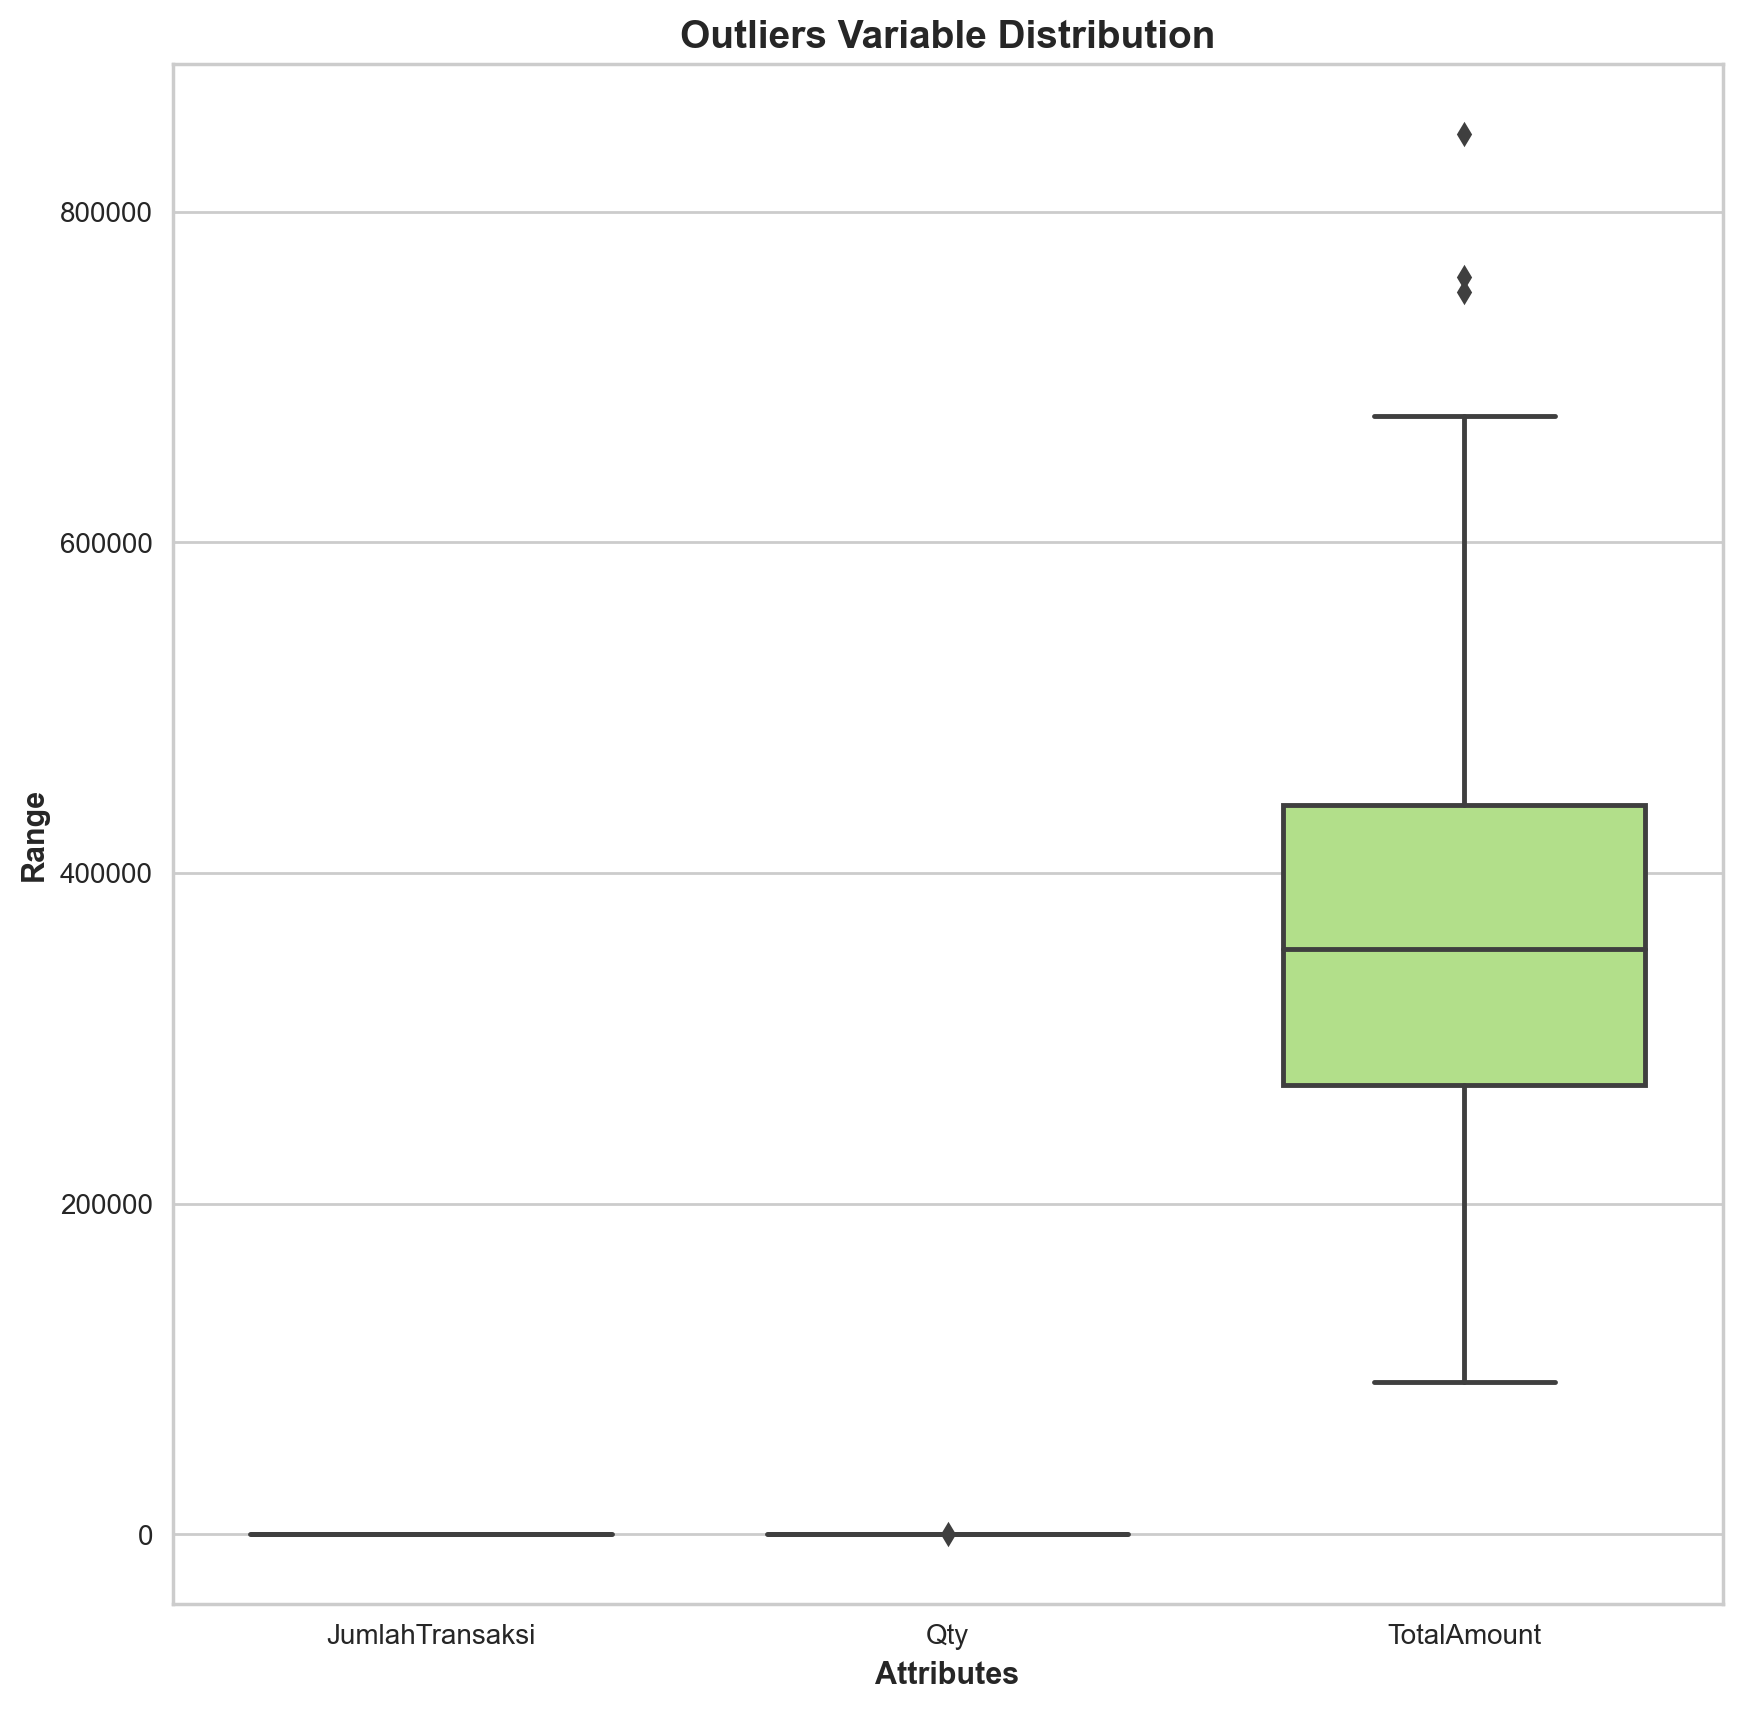

In [45]:
attributes = ['JumlahTransaksi','Qty','TotalAmount']
plt.rcParams['figure.figsize'] = [10,10]
sns.boxplot(data = data_untuk_clustering[attributes], orient="v", palette="Paired" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

**Mengatasi Outlier pada fitur-fitur dengan IQR**

In [46]:
# Removing (statistical) outliers for JumlahTransaksi

Q1 = data_untuk_clustering.JumlahTransaksi.quantile(0.25)
Q3 = data_untuk_clustering.JumlahTransaksi.quantile(0.75)
IQR = Q3 - Q1
data_untuk_clustering = data_untuk_clustering[(data_untuk_clustering.JumlahTransaksi >= Q1 - 1.5*IQR) & 
                                              (data_untuk_clustering.JumlahTransaksi <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Qty

Q1 = data_untuk_clustering.Qty.quantile(0.25)
Q3 = data_untuk_clustering.Qty.quantile(0.75)
IQR = Q3 - Q1
data_untuk_clustering = data_untuk_clustering[(data_untuk_clustering.Qty >= Q1 - 1.5*IQR) & 
                                              (data_untuk_clustering.Qty <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for TotalAmount

Q1 = data_untuk_clustering.TotalAmount.quantile(0.25)
Q3 = data_untuk_clustering.TotalAmount.quantile(0.75)
IQR = Q3 - Q1
data_untuk_clustering = data_untuk_clustering[(data_untuk_clustering.TotalAmount >= Q1 - 1.5*IQR) & 
                                              (data_untuk_clustering.TotalAmount <= Q3 + 1.5*IQR)]

Text(0.5, 0, 'Attributes')

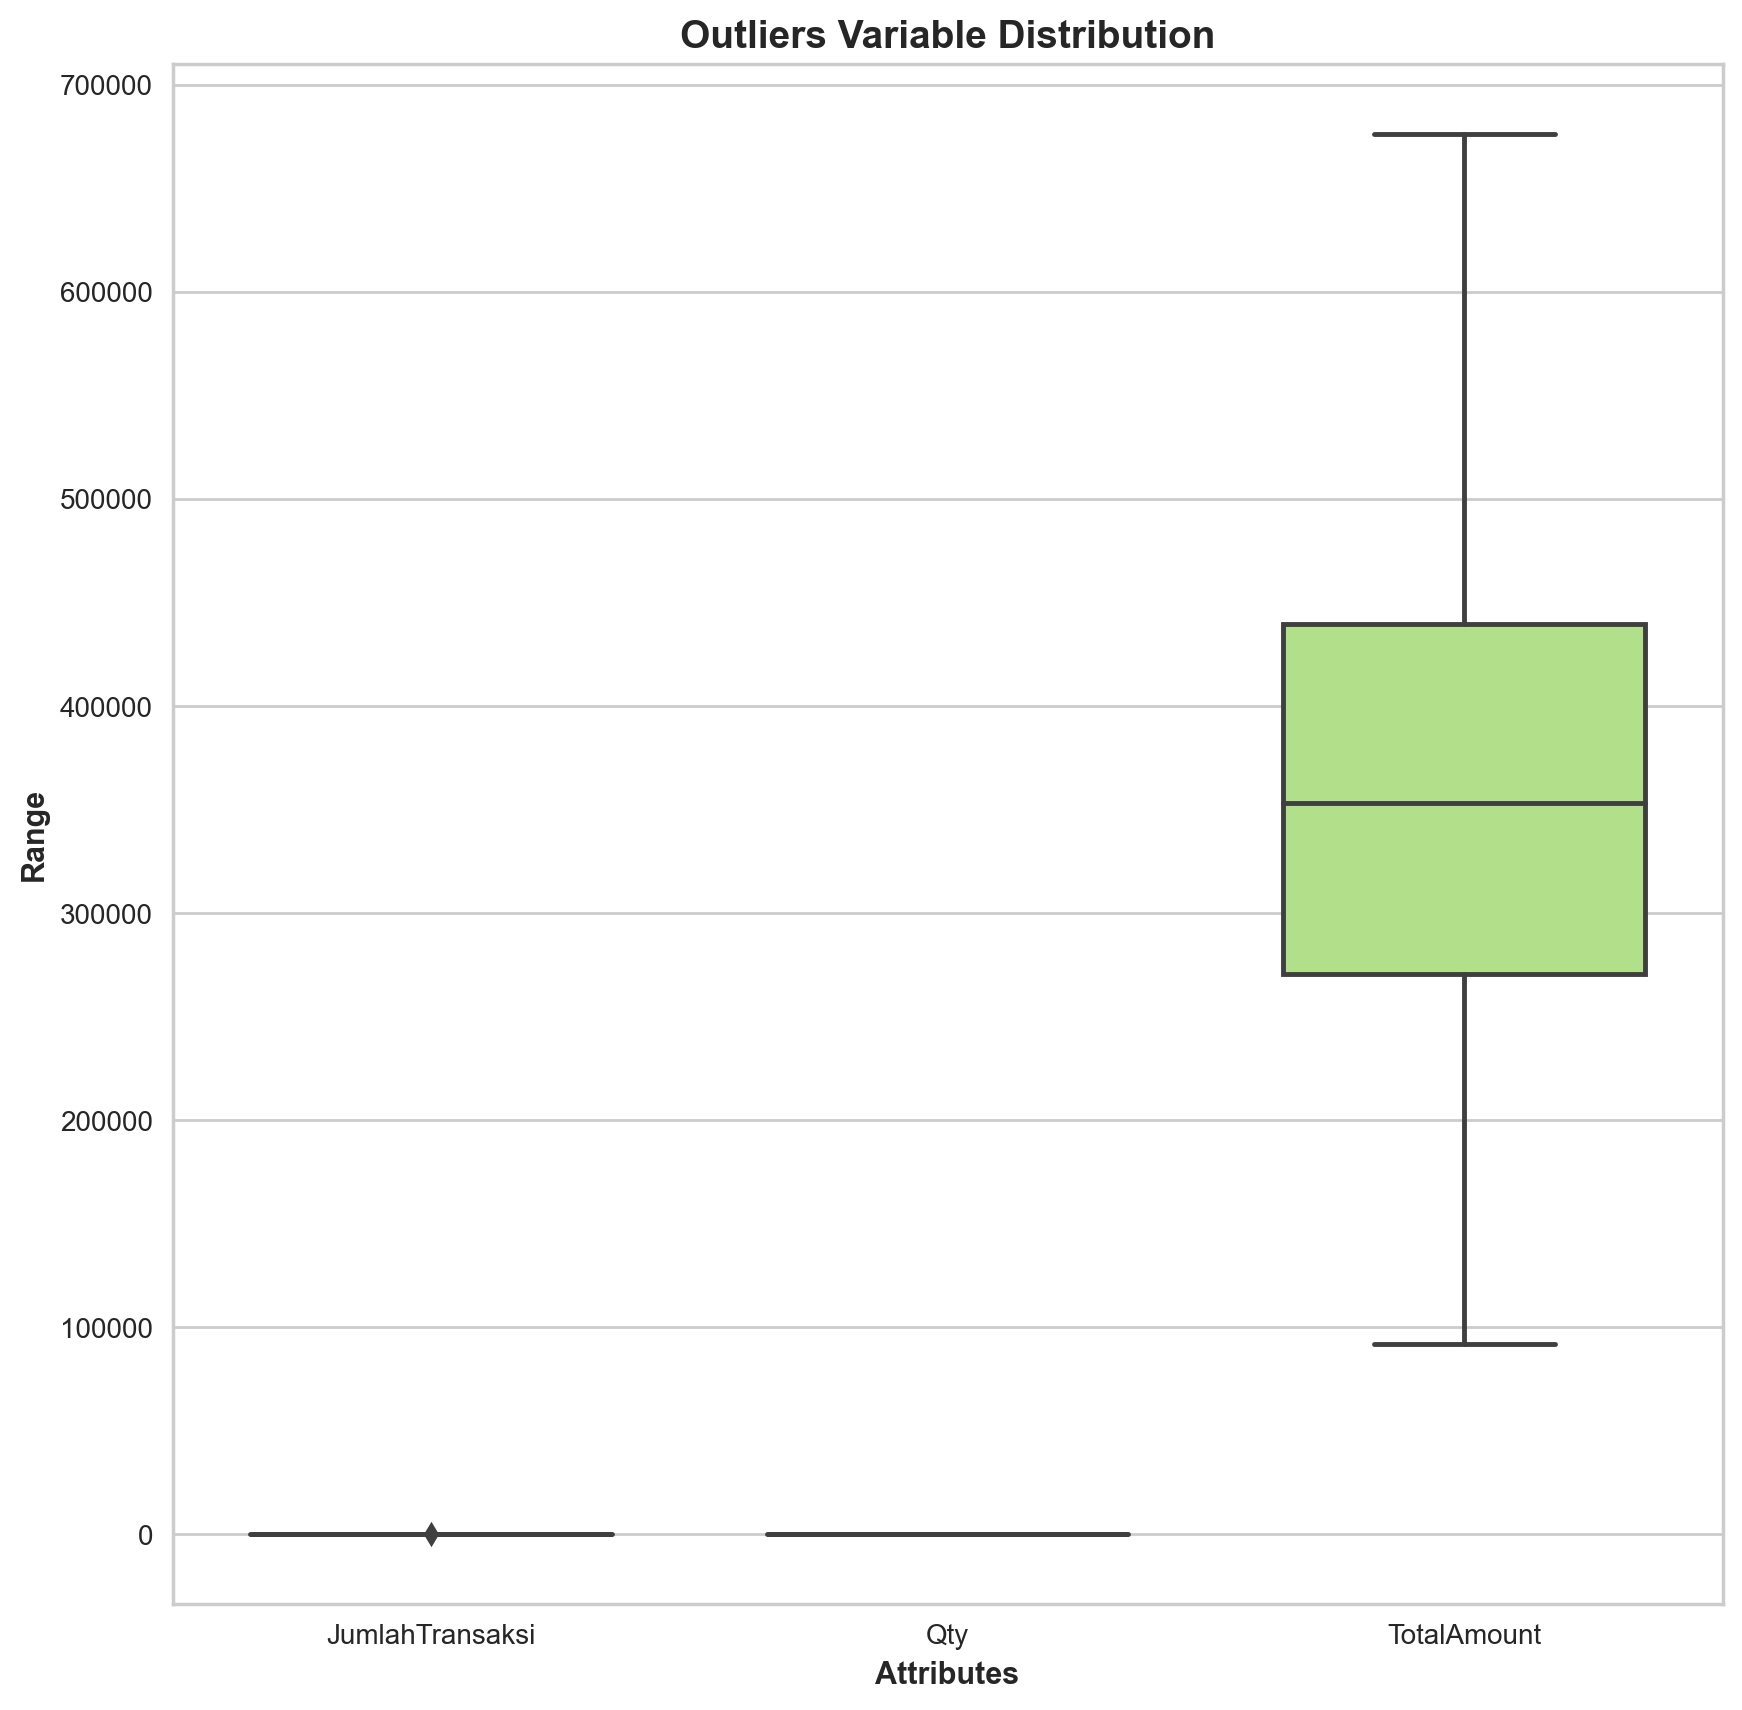

In [47]:
attributes = ['JumlahTransaksi','Qty','TotalAmount']
plt.rcParams['figure.figsize'] = [10,10]
sns.boxplot(data = data_untuk_clustering[attributes], orient="v", palette="Paired" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

### **6. Memeriksa Korelasi Antar Variabel**

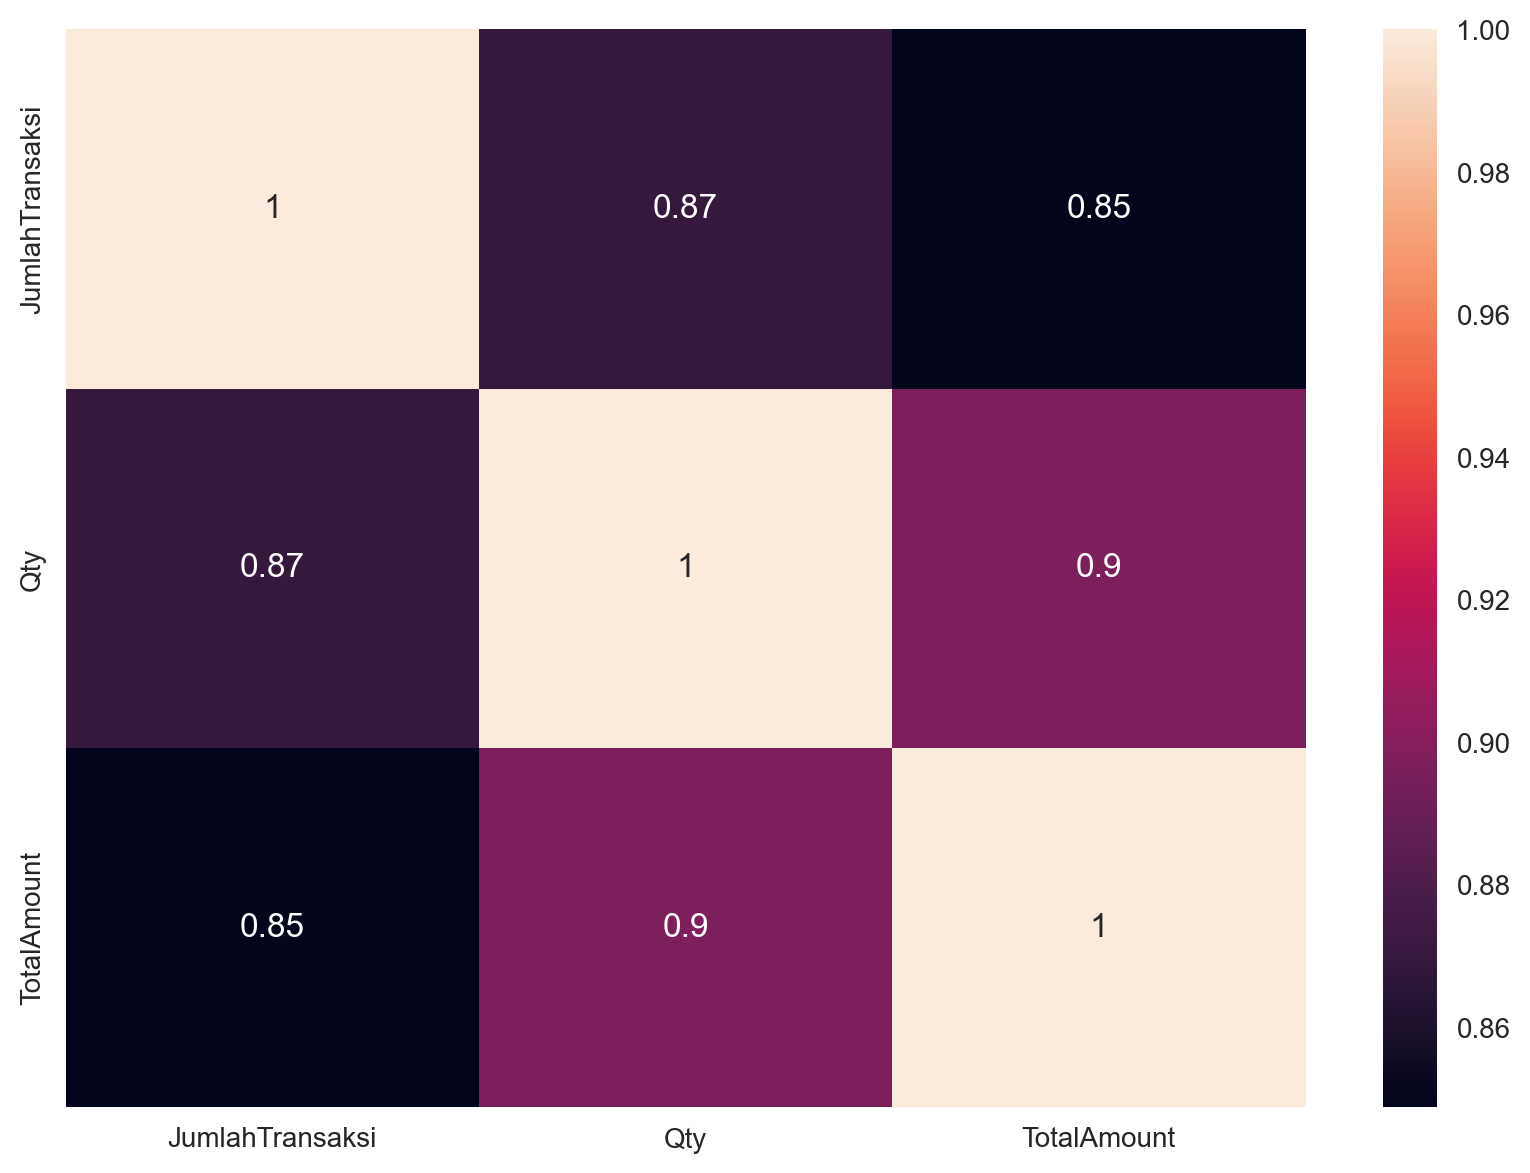

In [48]:
plt.figure(figsize=(10, 7))
sns.heatmap(data_untuk_clustering.corr(), annot=True)
plt.show()

### **7. Melakukan Standarisasi dengan MinMaxScaler**

In [49]:
# Mengubah Variabel Data Frame Menjadi Array 

data_untuk_clustering_array =  np.array(data_untuk_clustering)
print(data_untuk_clustering_array)

[[    17     60 623300]
 [    13     57 392300]
 [    15     56 446200]
 ...
 [    18     68 587200]
 [    11     42 423300]
 [    13     42 439300]]


In [50]:
# Menstandarkan Ukuran Variabel

scaler = MinMaxScaler()
data_untuk_clustering_scaled = scaler.fit_transform(data_untuk_clustering_array)
data_untuk_clustering_scaled

array([[0.77777778, 0.79365079, 0.90943332],
       [0.55555556, 0.74603175, 0.51395309],
       [0.66666667, 0.73015873, 0.60623181],
       ...,
       [0.83333333, 0.92063492, 0.84762883],
       [0.44444444, 0.50793651, 0.56702619],
       [0.55555556, 0.50793651, 0.59441876]])

### **8. Elbow Method**

In [51]:
# sum of squared distances
ssd = []

# may take a longer time to run (takes up to approximately 6 min)
for k in range(1, 12):
    model = KMeans(n_clusters=k, random_state=11)
    print(f"Clustering with n_clusters={k}")
    start = time()
    model.fit(data_untuk_clustering_scaled)
    print(f"Done clustering in {time()-start:.3f}s")

    ssd.append(model.inertia_)

Clustering with n_clusters=1
Done clustering in 0.578s
Clustering with n_clusters=2
Done clustering in 0.033s
Clustering with n_clusters=3
Done clustering in 0.039s
Clustering with n_clusters=4
Done clustering in 0.046s
Clustering with n_clusters=5
Done clustering in 0.069s
Clustering with n_clusters=6
Done clustering in 0.065s
Clustering with n_clusters=7
Done clustering in 0.067s
Clustering with n_clusters=8
Done clustering in 0.091s
Clustering with n_clusters=9
Done clustering in 0.094s
Clustering with n_clusters=10
Done clustering in 0.080s
Clustering with n_clusters=11
Done clustering in 0.096s


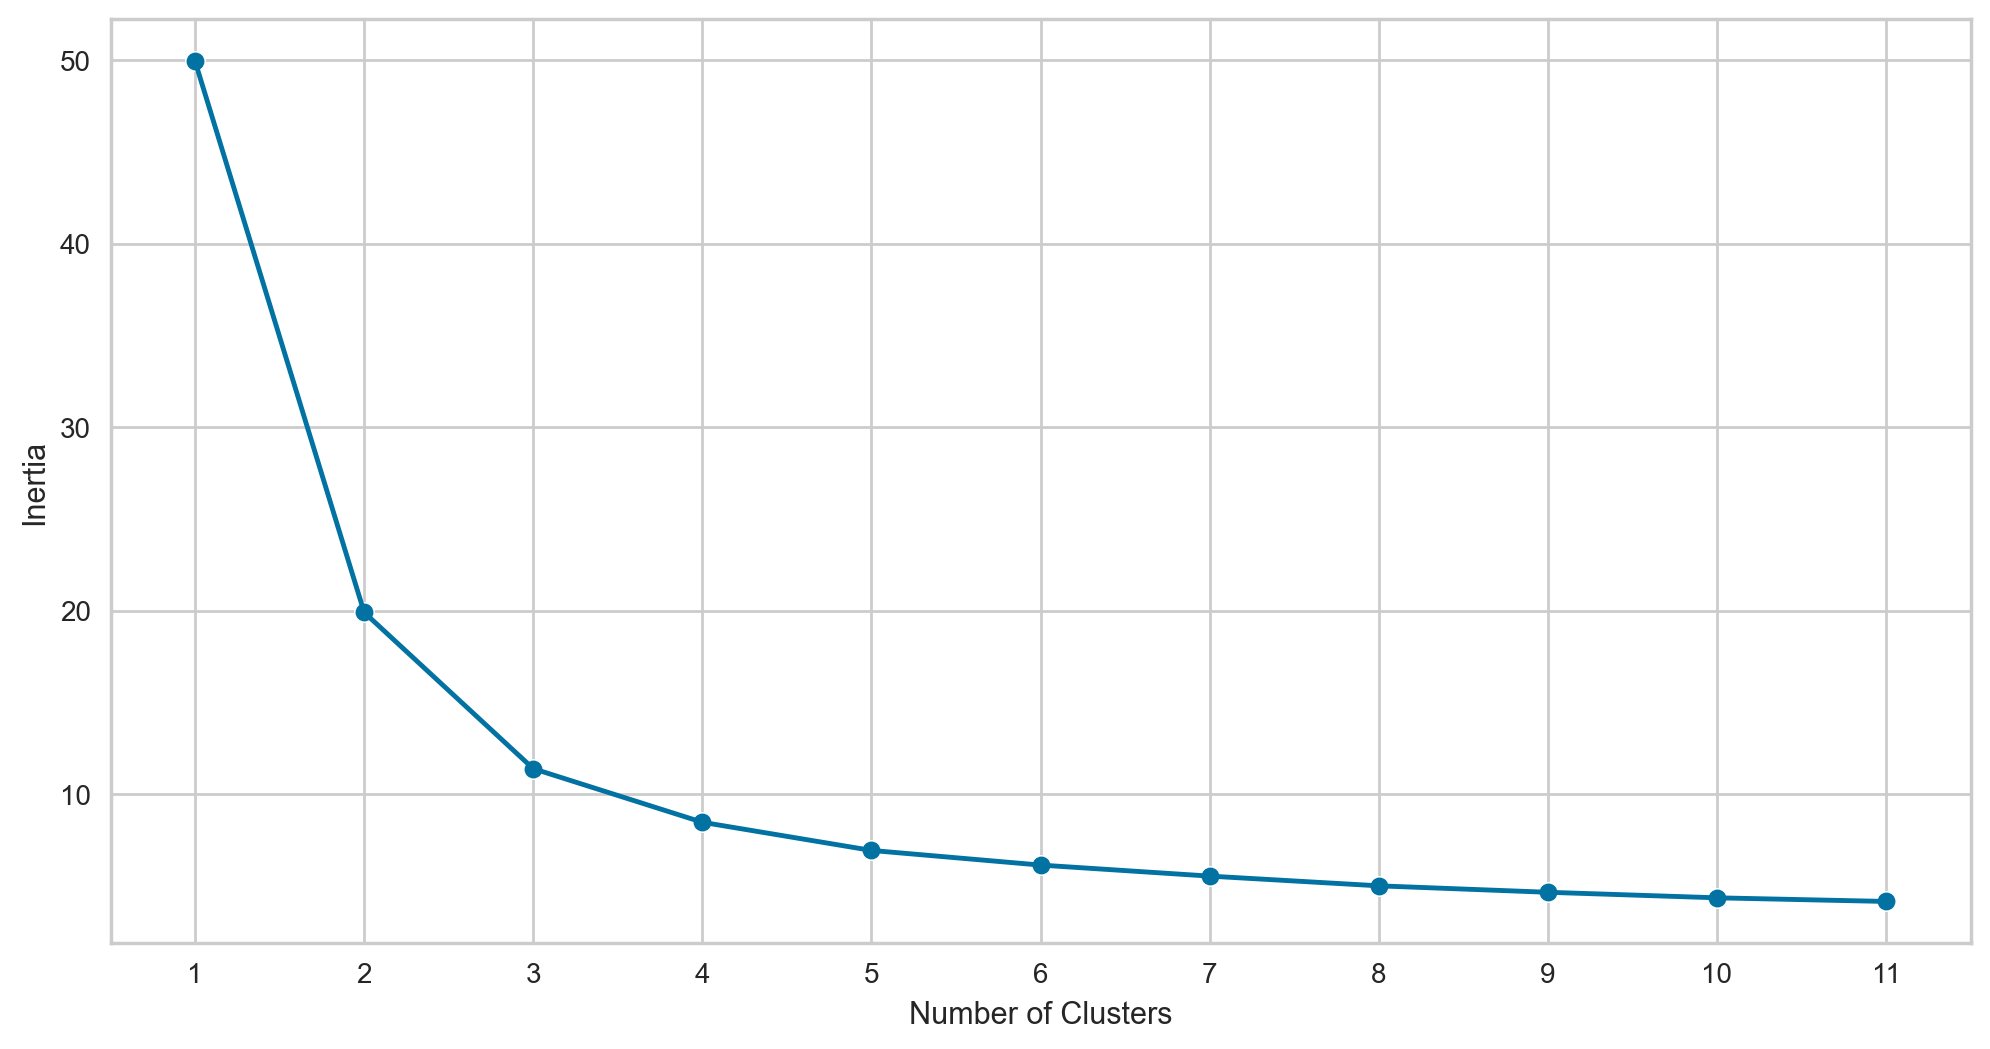

In [52]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(1, 12), y=ssd)
sns.scatterplot(x=range(1, 12), y=ssd)
plt.xticks(range(1, 12))
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

### **9. Silhouette Score**

In [53]:
silhouette_scores = []

for k in range(2, 21):
    model = KMeans(n_clusters=k, random_state=11)
    print(f"Clustering with n_clusters={k}")
    start = time()
    model.fit(data_untuk_clustering_scaled)
    print(f"Done clustering in {time()-start:.3f}s")

    print("Calculating silhouette coefficient..")
    start = time()
    silhouette_scores.append(silhouette_score(data_untuk_clustering_scaled, model.labels_))
    print(f"Done calculating in {time()-start:.3f}s")

Clustering with n_clusters=2
Done clustering in 0.039s
Calculating silhouette coefficient..
Done calculating in 0.009s
Clustering with n_clusters=3
Done clustering in 0.044s
Calculating silhouette coefficient..
Done calculating in 0.007s
Clustering with n_clusters=4
Done clustering in 0.082s
Calculating silhouette coefficient..
Done calculating in 0.000s
Clustering with n_clusters=5
Done clustering in 0.084s
Calculating silhouette coefficient..
Done calculating in 0.000s
Clustering with n_clusters=6
Done clustering in 0.083s
Calculating silhouette coefficient..
Done calculating in 0.007s
Clustering with n_clusters=7
Done clustering in 0.073s
Calculating silhouette coefficient..
Done calculating in 0.004s
Clustering with n_clusters=8
Done clustering in 0.082s
Calculating silhouette coefficient..
Done calculating in 0.017s
Clustering with n_clusters=9
Done clustering in 0.089s
Calculating silhouette coefficient..
Done calculating in 0.000s
Clustering with n_clusters=10
Done clustering in

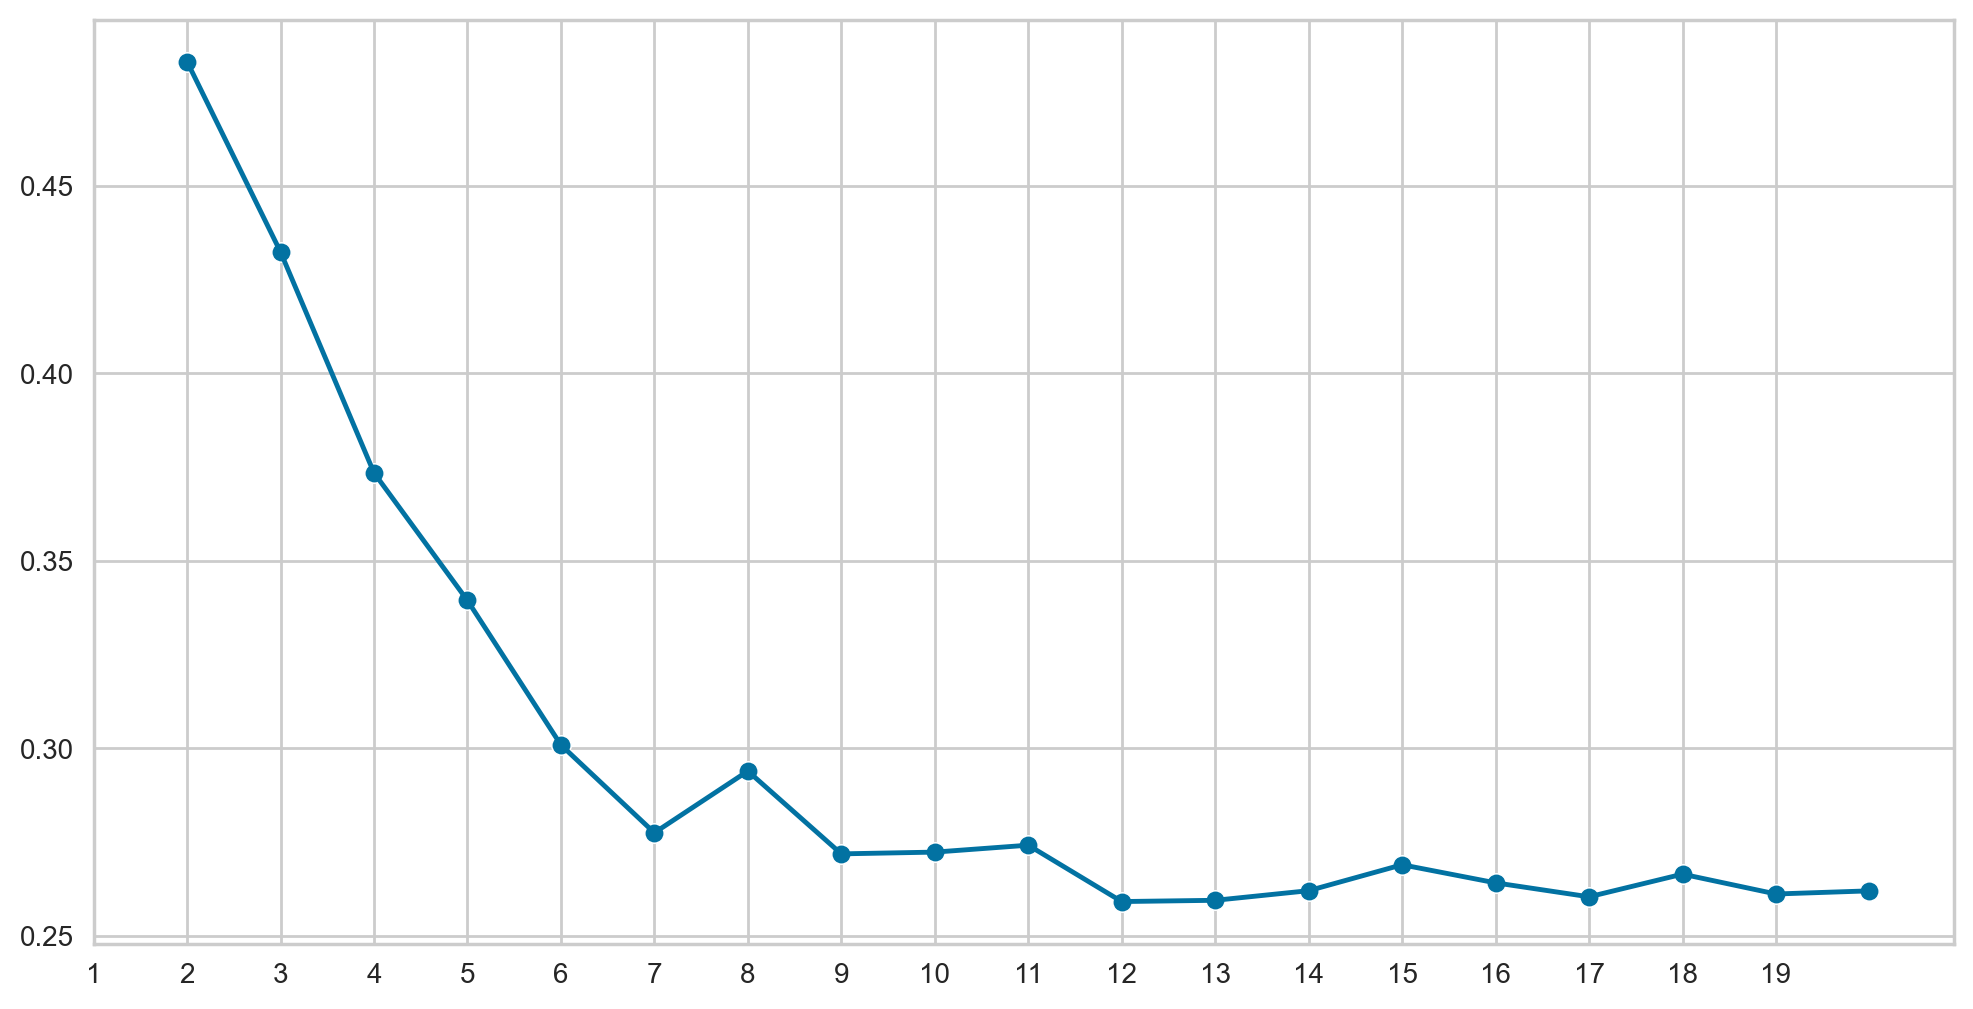

In [54]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(2, 21), y=silhouette_scores)
sns.scatterplot(x=range(2, 21), y=silhouette_scores)
plt.xticks(range(1, 20))
plt.show()

In [55]:
silhouette_scores

[0.4830523593417008,
 0.43232757137271466,
 0.37345532749335564,
 0.33943226897254614,
 0.30093689942544566,
 0.27752461935754713,
 0.29397003590196474,
 0.2719039963592017,
 0.2723704636883132,
 0.2742145466251653,
 0.25919361053422507,
 0.2595287009047611,
 0.26208994950246695,
 0.26900117554316844,
 0.2641778798245477,
 0.26045905474491093,
 0.26650221597191903,
 0.26120993547054655,
 0.26204656998608994]

In [56]:
# Algoritma K-Means Clustering (K = 3)

K = 3
kmeans = KMeans(n_clusters=K, random_state=11)

start = time()
kmeans.fit(data_untuk_clustering_scaled)
label=kmeans.predict(data_untuk_clustering_scaled)
print(f'Silhouette Score(n=3): {silhouette_score(data_untuk_clustering_scaled, label)}')
print(f"Done fitting kMeans in {time()-start:.3f}s")

Silhouette Score(n=3): 0.43232757137271466
Done fitting kMeans in 0.079s


In [57]:
# Menginput hasil K-Means Clustering dengan menambahkan kolom 'Cluster' pada tabel df_complete

clustered_data = data_untuk_clustering.assign(Cluster = kmeans.predict(data_untuk_clustering_scaled))

with pd.option_context("display.max_columns", None):
    display(clustered_data)

,JumlahTransaksi,Qty,TotalAmount,Cluster
CustomerID,,,,
1,17,60,623300,0
2,13,57,392300,0
3,15,56,446200,0
4,10,46,302500,1
5,7,27,268600,2
...,...,...,...,...
443,16,59,485100,0
444,18,62,577700,0
445,18,68,587200,0


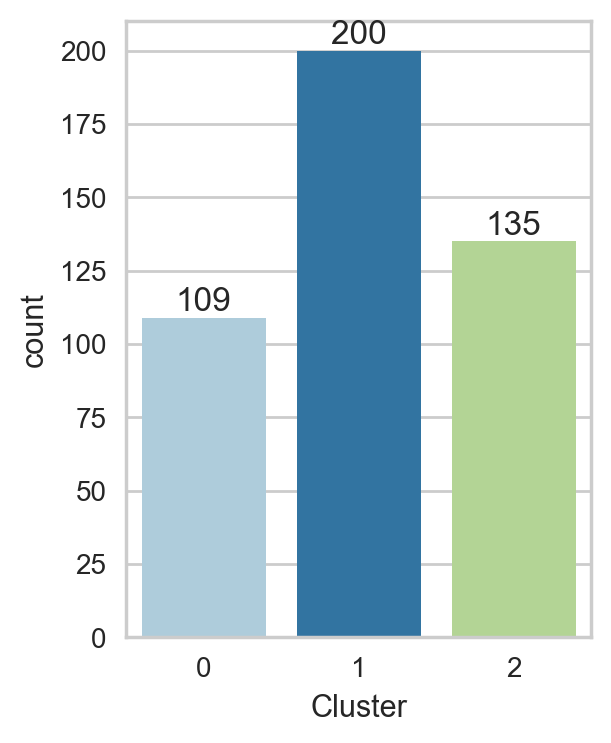

In [58]:
# Visualisasi Jumlah Anggota dalam Setiap Cluster (k=2)

plt.figure(figsize=(3,4))
ax = sns.countplot(x='Cluster', data=clustered_data, palette = 'Paired')
for label in ax.containers:
    ax.bar_label(label)
plt.xticks()
plt.show()

<Figure size 2000x1000 with 0 Axes>

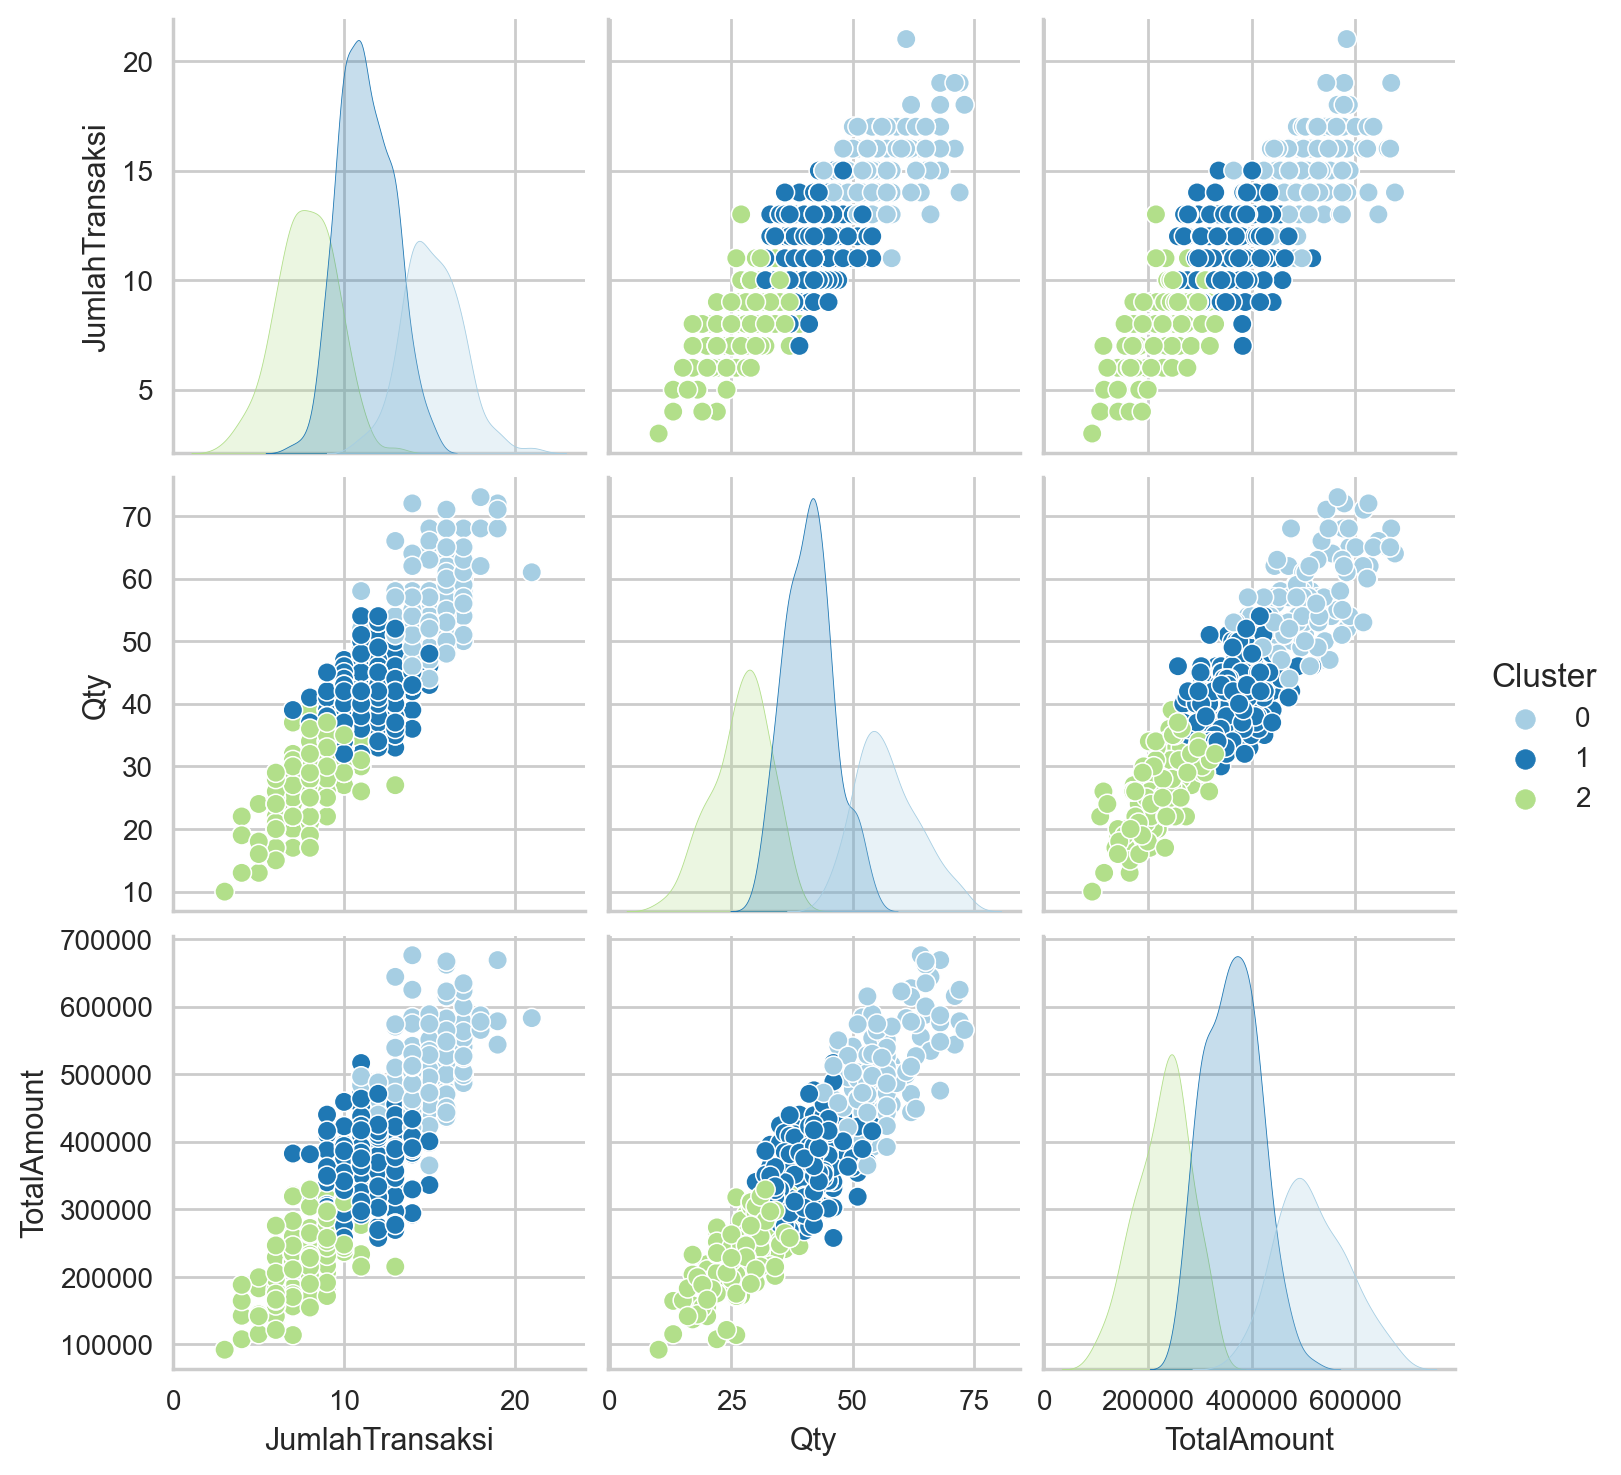

In [59]:
plt.figure(figsize=(20,10))

result = clustered_data.sample(frac=1,random_state=11)
sns.pairplot(result, hue="Cluster", palette="Paired")
plt.show()

In [60]:
# Melihat karakteristik setiap cluster dengan menggunakan rata-rata (mean)

final_cluster = clustered_data.groupby(['Cluster']).mean()
final_cluster

,JumlahTransaksi,Qty,TotalAmount
Cluster,,,
0,15.165138,57.073394,516344.036697
1,11.285000,41.070000,362176.500000
2,7.785185,26.933333,229388.888889


**Keterangan:**

>* **Cluster 0** -> Customer dalam kelompok ini adalah customer yang paling banyak melakukan transaksi, membeli item dengan jumlah banyak, dan menghasilkan total amount paling tinggi. Customer kelompok ini mendatangkan keuntungan. Diskon dan penawaran lain yang ditargetkan untuk kelompok ini akan meningkatkan transaksi dan pembelian sehingga dapat memaksimalkan keuntungan perusahaan.
> * **Cluster 1** -> Customer yang melakukan transaksi , membeli item dengan jumlah rata-rata, dan menghasilkan total amount sedang.
> * **Cluster 2** -> Customer yang sedikit melakukan transaksi, membeli item dengan jumlah sedikit, dan menghasilkan total amount rendah.

## **E. *Data Modeling (Time Series)***

In [61]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### **1. Memanggil Dataset**

In [62]:
# Memanggil dataset

data_transactions_final_2 = pd.read_csv('data_transactions_final.csv', index_col=[0])
data_transactions_final_2.head()

,TransactionID,Date,ProductID,ProductName,Price,Qty,TotalAmount,StoreID,StoreName,GroupStore,Type,Latitude,Longitude,CustomerID,Age,Gender,MaritalStatus,Income
0,TR11369,1/1/2022,P3,Crackers,7500,4,30000,12,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554",328,36.0,0.0,Married,"10,53"
1,TR16356,1/1/2022,P9,Yoghurt,10000,7,70000,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816,666",165,44.0,1.0,Married,"14,58"
2,TR1984,1/1/2022,P1,Choco Bar,8800,4,35200,4,Gita Ginara,Gita,General Trade,"-6,966,667","110,416,664",183,27.0,1.0,Single,"0,18"
3,TR35256,1/1/2022,P1,Choco Bar,8800,7,61600,4,Gita Ginara,Gita,General Trade,"-6,966,667","110,416,664",160,48.0,1.0,Married,"12,57"
4,TR41231,1/1/2022,P9,Yoghurt,10000,1,10000,4,Gita Ginara,Gita,General Trade,"-6,966,667","110,416,664",386,33.0,0.0,Married,"6,95"


### **2. Melihat Informasi Dataset**

In [63]:
data_transactions_final_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TransactionID  5020 non-null   object 
 1   Date           5020 non-null   object 
 2   ProductID      5020 non-null   object 
 3   ProductName    5020 non-null   object 
 4   Price          5020 non-null   int64  
 5   Qty            5020 non-null   int64  
 6   TotalAmount    5020 non-null   int64  
 7   StoreID        5020 non-null   int64  
 8   StoreName      5020 non-null   object 
 9   GroupStore     5020 non-null   object 
 10  Type           5020 non-null   object 
 11  Latitude       5020 non-null   object 
 12  Longitude      5020 non-null   object 
 13  CustomerID     5020 non-null   int64  
 14  Age            4945 non-null   float64
 15  Gender         4945 non-null   float64
 16  MaritalStatus  4945 non-null   object 
 17  Income         4945 non-null   object 
dtypes: float

In [64]:
# Mengubah Object Menjadi Datetime

data_transactions_final_2['Date'] = pd.to_datetime(data_transactions_final_2['Date'],infer_datetime_format=True)

In [65]:
data_transactions_final_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  5020 non-null   object        
 1   Date           5020 non-null   datetime64[ns]
 2   ProductID      5020 non-null   object        
 3   ProductName    5020 non-null   object        
 4   Price          5020 non-null   int64         
 5   Qty            5020 non-null   int64         
 6   TotalAmount    5020 non-null   int64         
 7   StoreID        5020 non-null   int64         
 8   StoreName      5020 non-null   object        
 9   GroupStore     5020 non-null   object        
 10  Type           5020 non-null   object        
 11  Latitude       5020 non-null   object        
 12  Longitude      5020 non-null   object        
 13  CustomerID     5020 non-null   int64         
 14  Age            4945 non-null   float64       
 15  Gender         4945 n

### **3. Melakukan Proses Grouping**

In [66]:
data_untuk_timeseries = data_transactions_final_2.groupby('Date').agg({'Qty': 'sum'})
data_untuk_timeseries

,Qty
Date,
2022-01-01,49
2022-01-02,50
2022-01-03,76
2022-01-04,98
2022-01-05,67
...,...
2022-12-27,70
2022-12-28,68
2022-12-29,42


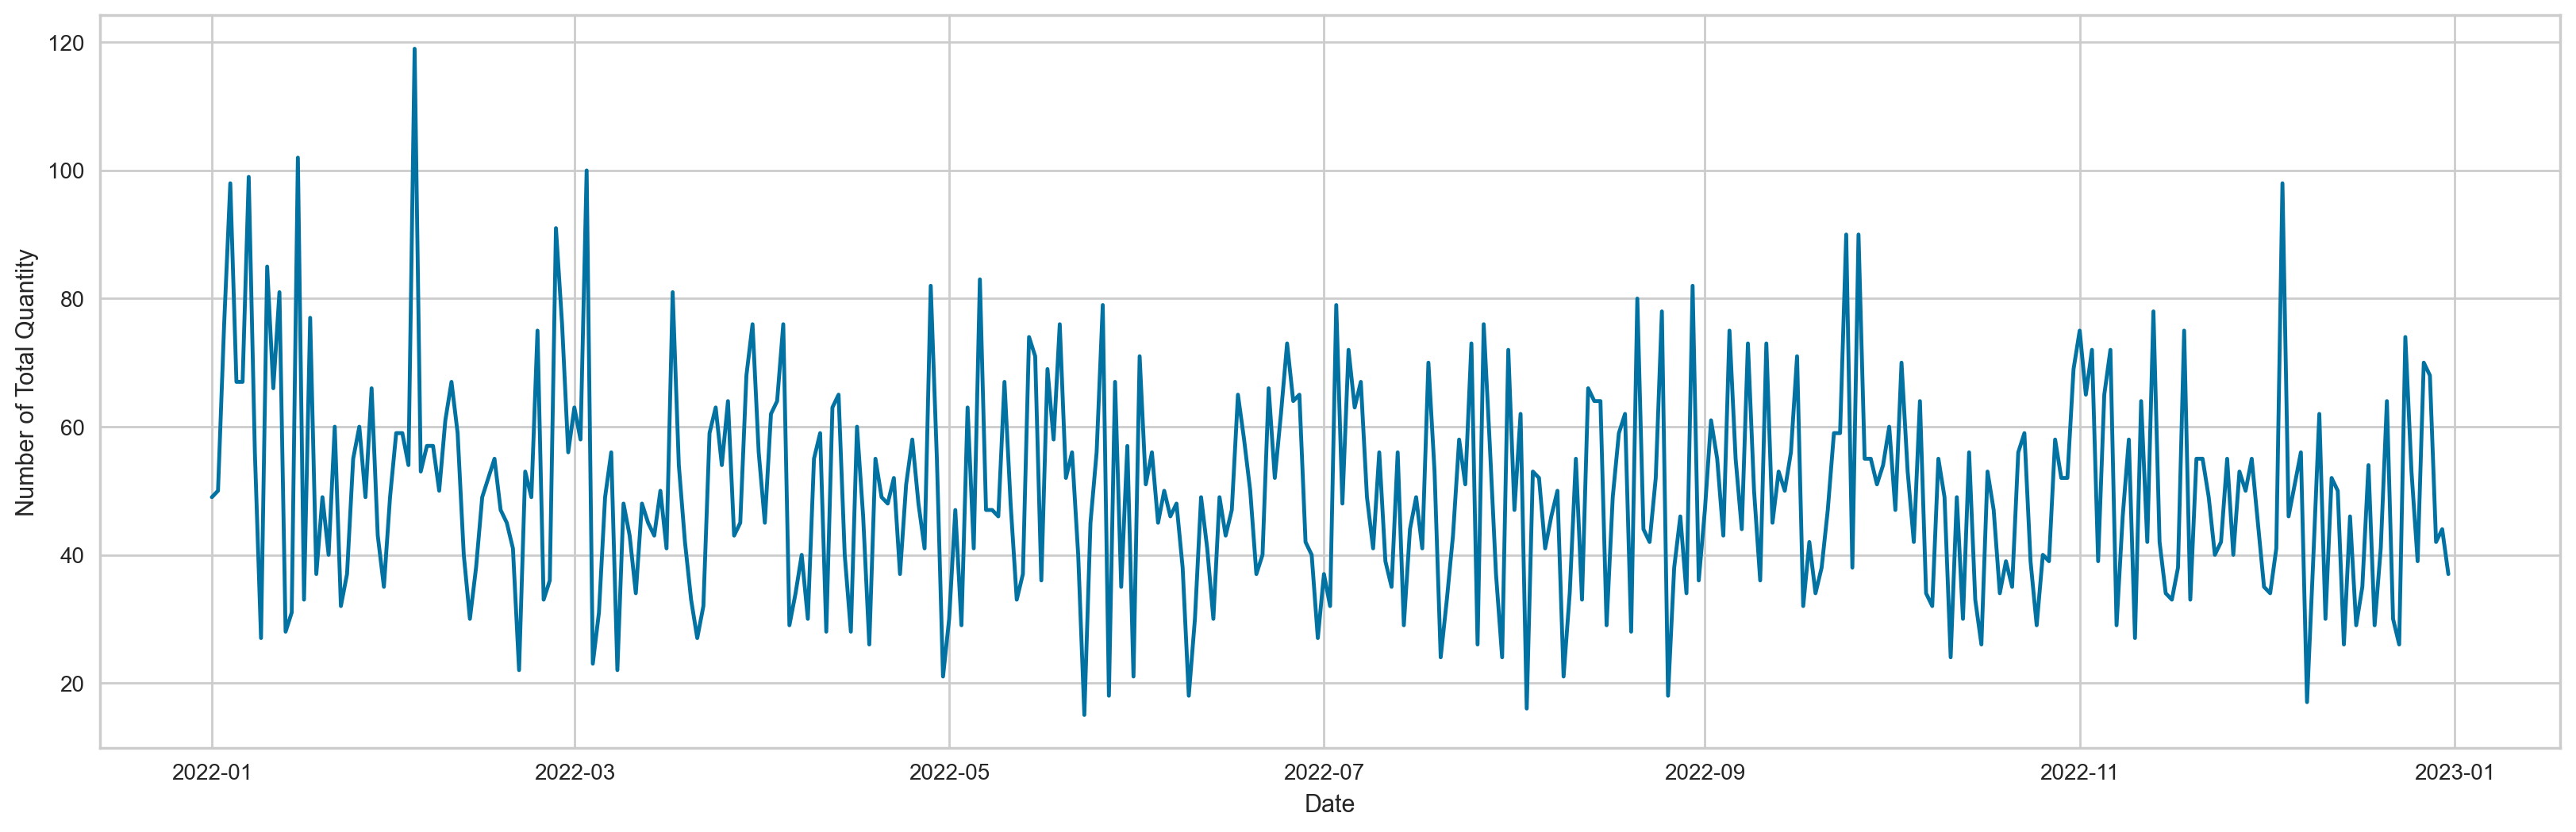

In [67]:
## plot graph
plt.figure(figsize=(20,6))
plt.xlabel('Date')
plt.ylabel('Number of Total Quantity')
plt.plot(data_untuk_timeseries)

### **5. Memeriksa Stationarity**

In [68]:
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
adf_test(data_untuk_timeseries['Qty'])

1. ADF :  -19.01878280229973
2. P-Value :  0.0
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 364
5. Critical Values :
	 1% :  -3.4484434475193777
	 5% :  -2.869513170510808
	 10% :  -2.571017574266393


**Keterangan:**
* Jika p<0,05; Data stasioner
* jika p>0.05; Data tidak stasioner

Ini bukan aturan yang baku, namun data yang stasioner harus memiliki nilai p yang kecil. Nilai p yang lebih besar dapat mengindikasikan adanya tren tertentu (rata-rata yang bervariasi) atau juga musiman.

### **4. ARIMA**

In [69]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(data_untuk_timeseries['Qty'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3098.997, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3094.267, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3096.267, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3096.267, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3933.778, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3098.260, Time=0.13 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.776 seconds


**Keterangan:** Kita dapat melihat bahwa model ARIMA terbaik tampaknya berada pada orde (0,0,0) dengan nilai AIC minimum = 3933.778. Dengan pengetahuan ini,
kita akhirnya dapat melanjutkan untuk melatih dan menyesuaikan model untuk mulai membuat prediksi

In [70]:
print(data_untuk_timeseries.shape)
train=data_untuk_timeseries.iloc[:-30]
test=data_untuk_timeseries.iloc[-30:]
print(train.shape,test.shape)

(365, 1)
(335, 1) (30, 1)


In [71]:
# Train test split

from statsmodels.tsa.arima_model import ARIMA
model=sm.tsa.arima.ARIMA(train['Qty'],order=(0,0,0))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    Qty   No. Observations:                  335
Model:                          ARIMA   Log Likelihood               -1416.612
Date:                Sun, 03 Sep 2023   AIC                           2837.225
Time:                        22:00:44   BIC                           2844.853
Sample:                    01-01-2022   HQIC                          2840.266
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.4866      0.969     52.119      0.000      48.588      52.385
sigma2       275.7678     19.733     13.975      0.000     237.091     314.444
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                24.26
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                             0.57
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

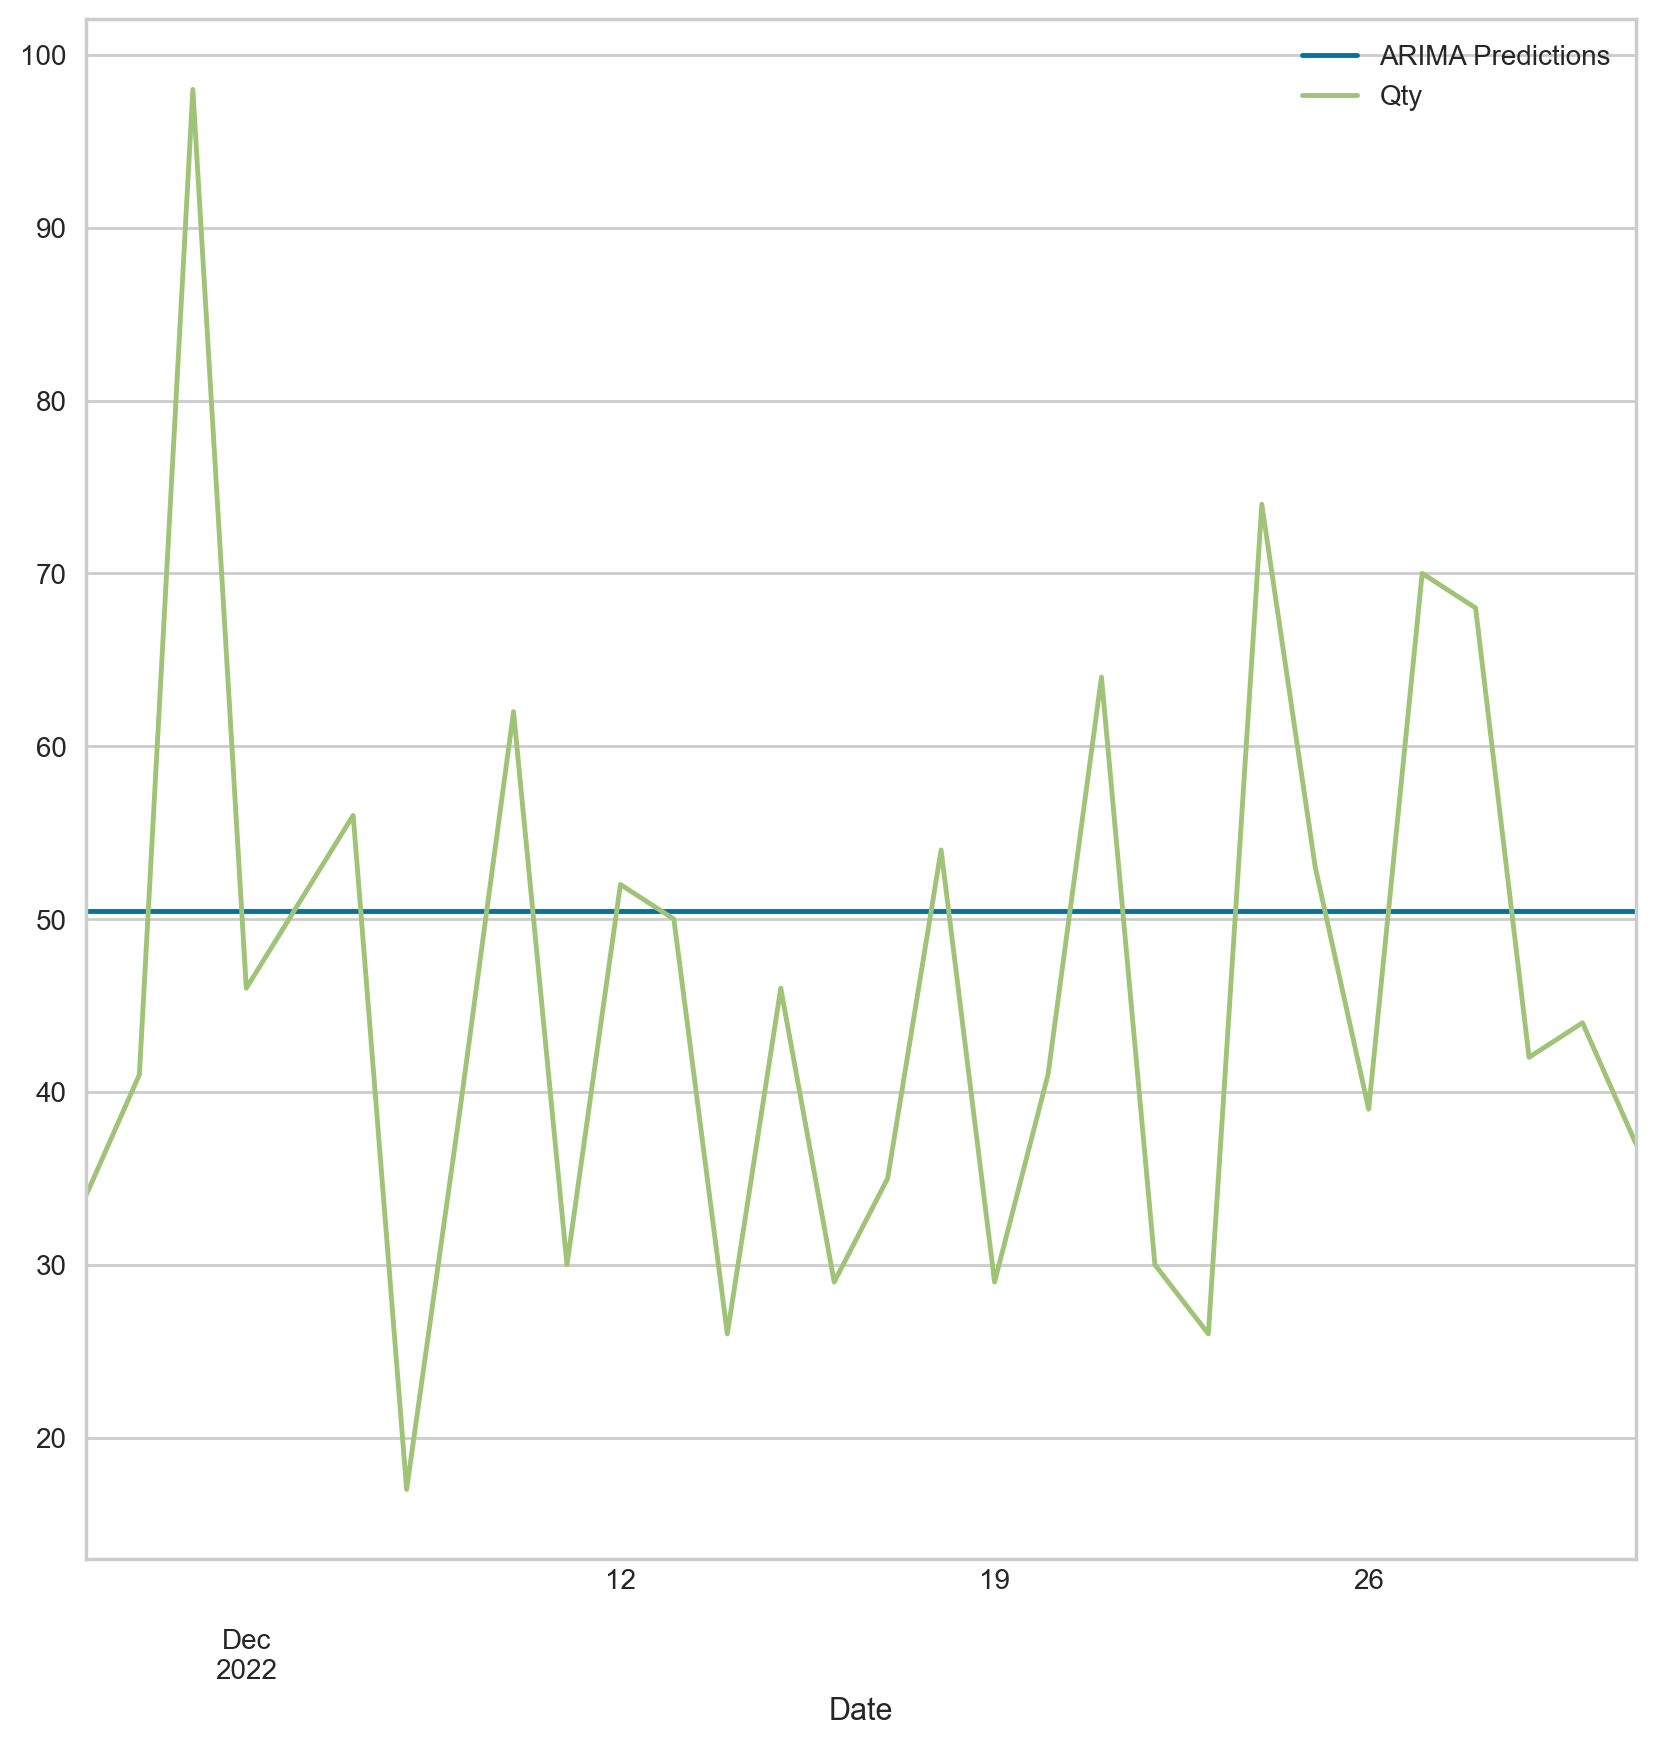

In [72]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['Qty'].plot(legend=True)

In [73]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['Qty'].mean()
rmse=sqrt(mean_squared_error(pred,test['Qty']))
print(rmse)

17.549888906746727


**Keterangan:**
> Penulis belum dapat mendapatkan prediksi yang baik